In [14]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [15]:
DARK_CURRENT = 0.15 #e/p/s
READ_NOISE = 9.3 #e

In [16]:
df = pd.read_csv("./dataset2/database_dataset2.csv") 

In [17]:
df

,file_name,filter_type,exposure_time,id_star,x_star,y_star,r_circle,r_in,r_out,npix_source,s_source_AVG,s_source_median,s_source_sum,npix_sky,s_sky_AVG,s_sky_median,s_sky_sum,SNR_AVG,SNR_median,SNR_sum
0,CCDC-LIGHT-20210110233126,g_prime,900,1,1013.0,1314.0,3.5,7,10.5,38,4364.24,3594,165841,195,3386.66,3380,660398,10.641552,8.791515,30.197187
1,CCDC-LIGHT-20210110231520,g_prime,600,1,NaN,NaN,3.5,7,10.5,39,3129.00,2610,122031,191,2475.39,2475,472799,8.757111,7.320009,25.821509
2,CCDC-LIGHT-20210110230348,g_prime,540,1,NaN,NaN,3.5,7,10.5,35,2931.60,2442,102606,189,2281.97,2283,429011,9.067048,7.568975,24.248157
3,CCDC-LIGHT-20210110225339,g_prime,480,1,NaN,NaN,3.5,7,10.5,40,2616.93,2238,104677,195,2088.69,2089,407295,7.856753,6.730149,23.556536
4,CCDC-LIGHT-20210110224433,g_prime,420,1,NaN,NaN,3.5,7,10.5,37,2412.81,2011,89274,195,1915.08,1906,373440,7.899344,6.612316,21.954550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,CCDB-LIGHT-20210110215105,r_prime,20,1,NaN,NaN,3.5,7,10.5,39,1182.64,1155,43123,191,1146.44,1147,218970,4.859551,4.746030,13.416526
65,CCDB-LIGHT-20210110215007,r_prime,15,1,NaN,NaN,3.5,7,10.5,39,1166.46,1148,45492,193,1123.76,1125,216885,4.843066,4.764793,14.231963
66,CCDB-LIGHT-20210110214840,r_prime,10,1,NaN,NaN,3.5,7,10.5,40,1128.08,1119,45123,192,1106.85,1106,212515,4.649014,4.613560,14.045541
67,CCDB-LIGHT-20210110214654,r_prime,5,1,NaN,NaN,3.5,7,10.5,39,1090.05,1083,42512,193,1077.65,1080,207986,4.618646,4.584533,13.581930


In [18]:
df['SNR_AVG'] = df['s_source_AVG']/np.sqrt( df['s_source_AVG'] + df['npix_source']*(1+(df['npix_source']/df['npix_sky']))*(df['s_sky_AVG'] + df['exposure_time']*DARK_CURRENT + READ_NOISE**2))

df['SNR_median'] = df['s_source_median']/np.sqrt( df['s_source_median'] + df['npix_source']*(1+(df['npix_source']/df['npix_sky']))*(df['s_sky_median'] + df['exposure_time']*DARK_CURRENT + READ_NOISE**2))

df['SNR_sum'] = df['s_source_sum']/np.sqrt( df['s_source_sum'] + df['npix_source']*(1+(df['npix_source']/df['npix_sky']))*(df['s_sky_sum'] + df['exposure_time']*DARK_CURRENT + READ_NOISE**2))


In [19]:
df.to_csv("dataset.csv", index=False)

SNR vs Exposure time with 3 Filters based on Mean

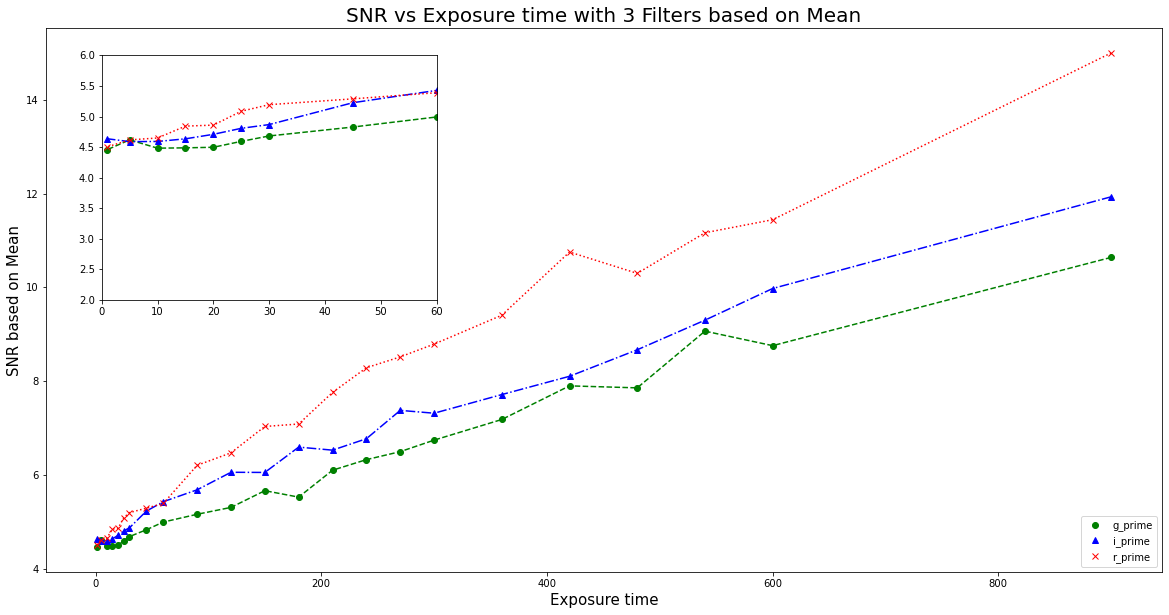

In [20]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

fig, ax1 = plt.subplots(figsize=(20,10))
plt.plot(df[df["filter_type"] == "g_prime"]["exposure_time"], df[df["filter_type"] == "g_prime"]["SNR_AVG"], 'go', label='g_prime')
plt.plot(df[df["filter_type"] == "g_prime"]["exposure_time"], df[df["filter_type"] == "g_prime"]["SNR_AVG"], 'g--')
plt.plot(df[df["filter_type"] == "i_prime"]["exposure_time"], df[df["filter_type"] == "i_prime"]["SNR_AVG"], 'b^', label='i_prime')
plt.plot(df[df["filter_type"] == "i_prime"]["exposure_time"], df[df["filter_type"] == "i_prime"]["SNR_AVG"], 'b-.')
plt.plot(df[df["filter_type"] == "r_prime"]["exposure_time"], df[df["filter_type"] == "r_prime"]["SNR_AVG"], 'rx', label='r_prime')
plt.plot(df[df["filter_type"] == "r_prime"]["exposure_time"], df[df["filter_type"] == "r_prime"]["SNR_AVG"], 'r:')
ax1.set_title('SNR vs Exposure time with 3 Filters based on Mean', fontsize=20)
ax1.set_xlabel('Exposure time', fontsize=15)
ax1.set_ylabel('SNR based on Mean',fontsize=15)
ax1.legend(loc=4)

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,0,0])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.05,0.5,0.3,0.45])
ax2.set_axes_locator(ip)


plt.plot(df[df["filter_type"] == "g_prime"]["exposure_time"], df[df["filter_type"] == "g_prime"]["SNR_AVG"], 'go', label='g_prime')
plt.plot(df[df["filter_type"] == "g_prime"]["exposure_time"], df[df["filter_type"] == "g_prime"]["SNR_AVG"], 'g--')
plt.plot(df[df["filter_type"] == "i_prime"]["exposure_time"], df[df["filter_type"] == "i_prime"]["SNR_AVG"], 'b^', label='i_prime')
plt.plot(df[df["filter_type"] == "i_prime"]["exposure_time"], df[df["filter_type"] == "i_prime"]["SNR_AVG"], 'b-.')
plt.plot(df[df["filter_type"] == "r_prime"]["exposure_time"], df[df["filter_type"] == "r_prime"]["SNR_AVG"], 'rx', label='r_prime')
plt.plot(df[df["filter_type"] == "r_prime"]["exposure_time"], df[df["filter_type"] == "r_prime"]["SNR_AVG"], 'r:')
ax2.set_xlim(0,60)
ax2.set_ylim(2,6)
# plt.savefig('snr_expt_filters.png')
plt.show()

SNR vs Exposure time with 3 Filters based on Median

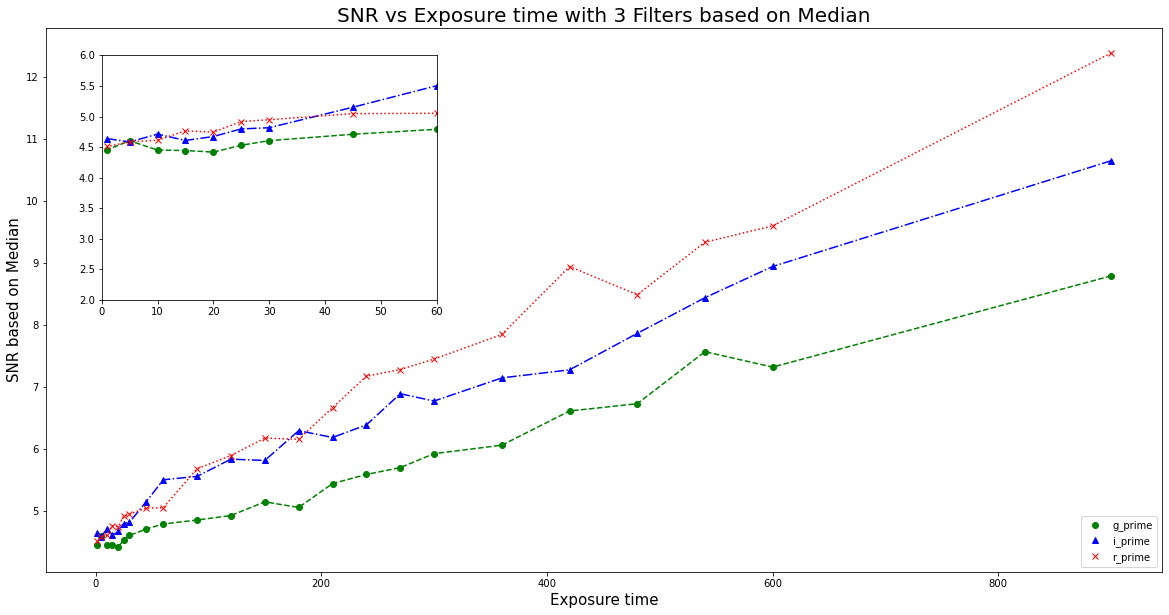

In [21]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.plot(df[df["filter_type"] == "g_prime"]["exposure_time"], df[df["filter_type"] == "g_prime"]["SNR_median"], 'go', label='g_prime')
plt.plot(df[df["filter_type"] == "g_prime"]["exposure_time"], df[df["filter_type"] == "g_prime"]["SNR_median"], 'g--')
plt.plot(df[df["filter_type"] == "i_prime"]["exposure_time"], df[df["filter_type"] == "i_prime"]["SNR_median"], 'b^', label='i_prime')
plt.plot(df[df["filter_type"] == "i_prime"]["exposure_time"], df[df["filter_type"] == "i_prime"]["SNR_median"], 'b-.')
plt.plot(df[df["filter_type"] == "r_prime"]["exposure_time"], df[df["filter_type"] == "r_prime"]["SNR_median"], 'rx', label='r_prime')
plt.plot(df[df["filter_type"] == "r_prime"]["exposure_time"], df[df["filter_type"] == "r_prime"]["SNR_median"], 'r:')
ax1.set_title('SNR vs Exposure time with 3 Filters based on Median', fontsize=20)
ax1.set_xlabel('Exposure time', fontsize=15)
ax1.set_ylabel('SNR based on Median',fontsize=15)
ax1.legend(loc=4)

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,0,0])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.05,0.5,0.3,0.45])
ax2.set_axes_locator(ip)


plt.plot(df[df["filter_type"] == "g_prime"]["exposure_time"], df[df["filter_type"] == "g_prime"]["SNR_median"], 'go', label='g_prime')
plt.plot(df[df["filter_type"] == "g_prime"]["exposure_time"], df[df["filter_type"] == "g_prime"]["SNR_median"], 'g--')
plt.plot(df[df["filter_type"] == "i_prime"]["exposure_time"], df[df["filter_type"] == "i_prime"]["SNR_median"], 'b^', label='i_prime')
plt.plot(df[df["filter_type"] == "i_prime"]["exposure_time"], df[df["filter_type"] == "i_prime"]["SNR_median"], 'b-.')
plt.plot(df[df["filter_type"] == "r_prime"]["exposure_time"], df[df["filter_type"] == "r_prime"]["SNR_median"], 'rx', label='r_prime')
plt.plot(df[df["filter_type"] == "r_prime"]["exposure_time"], df[df["filter_type"] == "r_prime"]["SNR_median"], 'r:')
ax2.set_xlim(0,60)
ax2.set_ylim(2,6)
# plt.savefig('snr_expt_filters.png')
plt.show()

SNR vs Exposure time with 3 Filters based on Sum

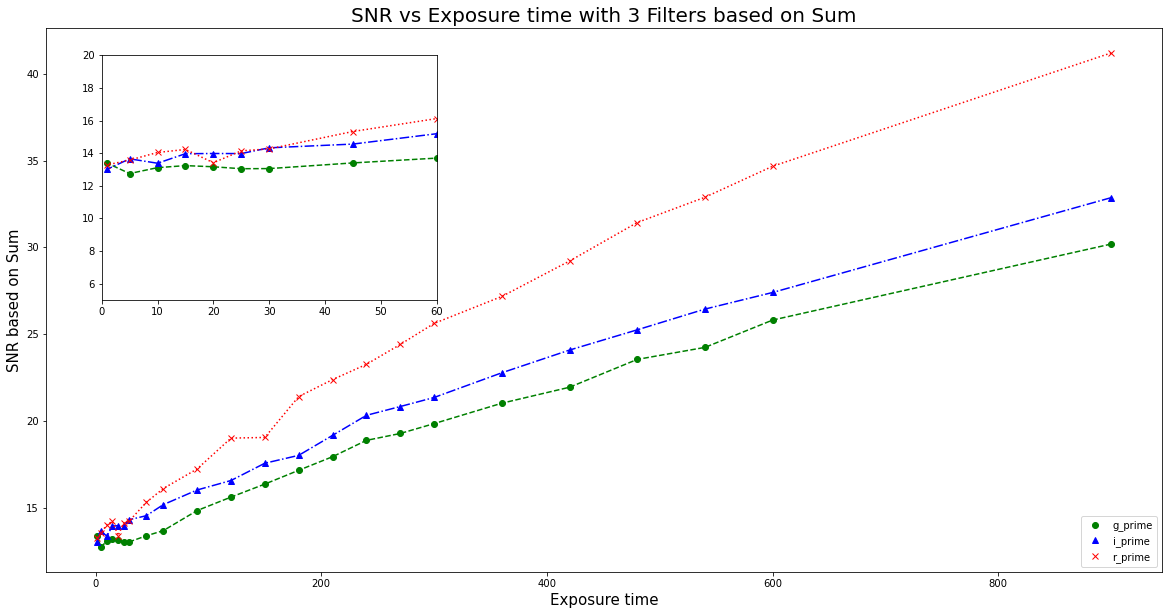

In [22]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.plot(df[df["filter_type"] == "g_prime"]["exposure_time"], df[df["filter_type"] == "g_prime"]["SNR_sum"], 'go', label='g_prime')
plt.plot(df[df["filter_type"] == "g_prime"]["exposure_time"], df[df["filter_type"] == "g_prime"]["SNR_sum"], 'g--')
plt.plot(df[df["filter_type"] == "i_prime"]["exposure_time"], df[df["filter_type"] == "i_prime"]["SNR_sum"], 'b^', label='i_prime')
plt.plot(df[df["filter_type"] == "i_prime"]["exposure_time"], df[df["filter_type"] == "i_prime"]["SNR_sum"], 'b-.')
plt.plot(df[df["filter_type"] == "r_prime"]["exposure_time"], df[df["filter_type"] == "r_prime"]["SNR_sum"], 'rx', label='r_prime')
plt.plot(df[df["filter_type"] == "r_prime"]["exposure_time"], df[df["filter_type"] == "r_prime"]["SNR_sum"], 'r:')
ax1.set_title('SNR vs Exposure time with 3 Filters based on Sum', fontsize=20)
ax1.set_xlabel('Exposure time', fontsize=15)
ax1.set_ylabel('SNR based on Sum',fontsize=15)
ax1.legend(loc=4)

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,0,0])
# Manually set the position and relative size of the inset axes within_sum
ip = InsetPosition(ax1, [0.05,0.5,0.3,0.45])
ax2.set_axes_locator(ip)
plt.plot(df[df["filter_type"] == "g_prime"]["exposure_time"], df[df["filter_type"] == "g_prime"]["SNR_sum"], 'go', label='g_prime')
plt.plot(df[df["filter_type"] == "g_prime"]["exposure_time"], df[df["filter_type"] == "g_prime"]["SNR_sum"], 'g--')
plt.plot(df[df["filter_type"] == "i_prime"]["exposure_time"], df[df["filter_type"] == "i_prime"]["SNR_sum"], 'b^', label='i_prime')
plt.plot(df[df["filter_type"] == "i_prime"]["exposure_time"], df[df["filter_type"] == "i_prime"]["SNR_sum"], 'b-.')
plt.plot(df[df["filter_type"] == "r_prime"]["exposure_time"], df[df["filter_type"] == "r_prime"]["SNR_sum"], 'rx', label='r_prime')
plt.plot(df[df["filter_type"] == "r_prime"]["exposure_time"], df[df["filter_type"] == "r_prime"]["SNR_sum"], 'r:')
ax2.set_xlim(0,60)
ax2.set_ylim(5,20)
# plt.savefig('snr_expt_filters.png')
plt.show()